# TODO 

DTI changed look at DTI graphs
- change questions analysis
- change dashboard following f and v pattern (create new dashboard)

# Problem Identification

Personal financial **risk assessment is important to analyze because it allows us to reduce financial risk through effective risk management.**

Thus, this project is used to `analyze personal risk assessment` globally

The main objectives of this project is described using SMART Framework defined below.

> To reduce the occurrence of high financial risk ratings globally by 3% within 3 months, I will analyze a dataset gathered from Kaggle. This analysis will involve formulating relevant questions and creating visualizations based on the identified issues. The findings will help understand the contributing factors and provide targeted recommendations to address the high financial risk ratings.

As stated in my previous objectives, I want to analyze my dataset to answer the following questions:

1. What's the `sum of loan based on education level and risk rating`

2. What's the `average of debt-to-income ratio grouped by employment status and age group`

3. What's the `average assets based on their educational level and risk rating`

4. What's the `proportion of high financial risk rating by age group`

5. What's the `proportion of loan purposes by high financial risk rating`

6. What's the `distribution of debt-to-income ratio by financial risk rating`

7. How are the `education level and risk rating correlated?`

Based on my previous questions, I will use relevant data to support my analysis, which are:

- Age
- Assets Value
- Debt-to-Income Ratio
- Education Level
- Employment Status
- Income
- Loan Amount
- Loan Purpose
- Risk Rating

# Import Libs

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import scipy.stats as stats

# Data Loading

In this section I will load the dataset that was gathered from [kaggle](https://www.kaggle.com/datasets/preethamgouda/financial-risk) and do some simple inspections, such as:

- Inspect the dataset's overview
- Inspect dataset's summary
- Inspect dataset's column names
- Inspect unique values of multiple columns in the dataframe

In [2]:
# define const
FILE_PATH = "dataset/financial_risk_assessment.csv"

In [3]:
# load dataset 
df = pd.read_csv(FILE_PATH)
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


Insights:
- There are 15,000 rows and 20 columns in the dataset
- There are some missing values on assets value and number of dependents, but there might be any on other columns as well

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [5]:
df.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

## Insights & Actions

Insights:   
- There are 15,000 observations and 20 columns in the dataset.
- There are some columns containing missing values of 2,250 observations, such as: `Income`, `Credit Score`, `Loan Amount`, `Assets Value`, `Number of Dependents`

- Some columns are using inappropriate data type, this problem defined as follows:
    - Should be `categorical`:
        - Employment Status
        - Education Level
        - Risk Rating
        - Loan Purpose

Actions:
- Adjust data type of columns defined above
- Identify missing values whether the are MAR, MCAR, or MNAR. But, **I need to filter required columns first**

In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

Insights:

- All columns' names are clear and ready to be used for further analysis

In [7]:
# loop through columns with object data type
for col in df.select_dtypes(include="object").columns:
        print(col)
        print(df[col].unique(), end="\n\n")

Gender
['Male' 'Female' 'Non-binary']

Education Level
['PhD' "Bachelor's" "Master's" 'High School']

Marital Status
['Divorced' 'Widowed' 'Single' 'Married']

Loan Purpose
['Business' 'Auto' 'Home' 'Personal']

Employment Status
['Unemployed' 'Employed' 'Self-employed']

Payment History
['Poor' 'Fair' 'Excellent' 'Good']

City
['Port Elizabeth' 'North Catherine' 'South Scott' ... 'Susanstad'
 'South Morganchester' 'Port Wayne']

State
['AS' 'OH' 'OK' 'PR' 'IL' 'TN' 'MD' 'MA' 'DC' 'VT' 'NH' 'NM' 'IA' 'AZ'
 'MH' 'MO' 'MS' 'MP' 'DE' 'UT' 'KS' 'VI' 'CO' 'OR' 'VA' 'GA' 'ID' 'HI'
 'AL' 'TX' 'WY' 'KY' 'WA' 'RI' 'LA' 'MI' 'WV' 'ND' 'NY' 'NJ' 'CT' 'PW'
 'NV' 'FM' 'CA' 'NC' 'IN' 'GU' 'AR' 'WI' 'SD' 'MT' 'MN' 'NE' 'SC' 'ME'
 'AK' 'PA' 'FL']

Country
['Cyprus' 'Turkmenistan' 'Luxembourg' 'Uganda' 'Namibia' 'Iceland'
 'Bouvet Island (Bouvetoya)' 'Honduras' 'Pitcairn Islands' 'Thailand'
 'French Guiana' 'Antarctica (the territory South of 60 deg S)' 'Eritrea'
 'Grenada' 'Solomon Islands' 'Guadeloup

Insights:
- Gender, Eduational Level, Marital Status, Loan Purpose, Employment Status, Payment History, City, State, Country, and Risk Rating columns are categorical columns and need a data type adjustment

# Data Cleaning & Preparation

This section used to prepare and clean the dataset for further analysis

In [8]:
# create a copy of dataframe to preserve the original df
df_clean = df.copy()

## Filter Required Columns

As mentioned earlier, the columns that needed for further analysis are:
- Age
- Assets Value
- Debt-to-Income Ratio
- Education Level
- Employment Status
- Income
- Loan Amount
- Loan Purpose
- Risk Rating

In [9]:
# filter columns
df_clean = df_clean[[
        "Age",
        "Assets Value",
        "Debt-to-Income Ratio",
        "Education Level",
        "Employment Status",
        "Income",
        "Loan Amount",
        "Loan Purpose",
        "Risk Rating",
]].copy()

df_clean.head()

,Age,Assets Value,Debt-to-Income Ratio,Education Level,Employment Status,Income,Loan Amount,Loan Purpose,Risk Rating
0,49,120228.0,0.154313,PhD,Unemployed,72799.0,45713.0,Business,Low
1,57,55849.0,0.148920,Bachelor's,Employed,NaN,33835.0,Auto,Medium
2,21,180700.0,0.362398,Master's,Employed,55687.0,36623.0,Home,Medium
3,59,157319.0,0.454964,Bachelor's,Unemployed,26508.0,26541.0,Personal,Medium
4,25,287140.0,0.143242,Bachelor's,Unemployed,49427.0,36528.0,Personal,Low


> Successfully filter needed columns

## Create New Columns

In this section, I will create new columns to support my analysis:
- Since `I need the age to be groupped` and the dataset contains numerical age, I will `create new column called Age Group`

In [10]:
# use cut() to group age
df_clean["Age Group"] = pd.cut(
    df_clean['Age'], 
    bins=[18, 28, 38, 48, 58, 69], 
    labels=["18-28", "28-38", "38-48", "48-58", "58-69"], 
    right=True,
    include_lowest=True
)

In [11]:
df_clean.head()

,Age,Assets Value,Debt-to-Income Ratio,Education Level,Employment Status,Income,Loan Amount,Loan Purpose,Risk Rating,Age Group
0,49,120228.0,0.154313,PhD,Unemployed,72799.0,45713.0,Business,Low,48-58
1,57,55849.0,0.148920,Bachelor's,Employed,NaN,33835.0,Auto,Medium,48-58
2,21,180700.0,0.362398,Master's,Employed,55687.0,36623.0,Home,Medium,18-28
3,59,157319.0,0.454964,Bachelor's,Unemployed,26508.0,26541.0,Personal,Medium,58-69
4,25,287140.0,0.143242,Bachelor's,Unemployed,49427.0,36528.0,Personal,Low,18-28


In [12]:
df_clean.isna().sum()

Age                        0
Assets Value            2250
Debt-to-Income Ratio       0
Education Level            0
Employment Status          0
Income                  2250
Loan Amount             2250
Loan Purpose               0
Risk Rating                0
Age Group                  0
dtype: int64

## Adjust Column Data Type

In [13]:
df_clean.dtypes

Age                        int64
Assets Value             float64
Debt-to-Income Ratio     float64
Education Level           object
Employment Status         object
Income                   float64
Loan Amount              float64
Loan Purpose              object
Risk Rating               object
Age Group               category
dtype: object

In this part, I will adjust columns' data types based on following scenarios:
- Change to `category`
    - Employment Status
    - Education Level (`ordinal`)
    - Risk Rating (`ordinal`)
    - Loan Purpose
 
- Change to `int`
    - Assets Value
    - Income
    - Loan Amount

### Ordinal

In [14]:
def dTypeToOrdinal(series:str, cat_order_list:list):
    """
    Adjust :series data type into ordinal category based on :cat_order_list

    :series -> str
    :cat_order_list -> list

    :return series with ordinal data type
    """
    
    return pd.Categorical(
        series, 
        categories=cat_order_list, 
        ordered=True
    )

In [15]:
education_level_cat_order = ["High School", "Bachelor's", "Master's", "PhD"]
df_clean["Education Level"] = dTypeToOrdinal(
    df_clean["Education Level"],
    education_level_cat_order
)

In [16]:
df_clean["Education Level"].dtype

CategoricalDtype(categories=['High School', 'Bachelor's', 'Master's', 'PhD'], ordered=True, categories_dtype=object)

In [17]:
risk_rating_cat_order = ["Low", "Medium", "High"]
df_clean["Risk Rating"] = dTypeToOrdinal(
    df_clean["Risk Rating"],
    risk_rating_cat_order
)

In [18]:
df_clean["Risk Rating"].dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True, categories_dtype=object)

### Nominal

In [19]:
# convert these columns into category
df_clean[[
    "Employment Status", 
    "Loan Purpose"
]] = df_clean[[
    "Employment Status", 
    "Loan Purpose"
]].astype("category")

In [20]:
# check columns' data types
df_clean.dtypes

Age                        int64
Assets Value             float64
Debt-to-Income Ratio     float64
Education Level         category
Employment Status       category
Income                   float64
Loan Amount              float64
Loan Purpose            category
Risk Rating             category
Age Group               category
dtype: object

### Int

In [21]:
# change data types to int and ignore missing values to be converted into int
df_clean[[
    "Assets Value",
    "Income",
    "Loan Amount"
]] = df_clean[[
    "Assets Value",
    "Income",
    "Loan Amount"
]].astype("int", errors="ignore")

In [22]:
df_clean.dtypes

Age                        int64
Assets Value             float64
Debt-to-Income Ratio     float64
Education Level         category
Employment Status       category
Income                   float64
Loan Amount              float64
Loan Purpose            category
Risk Rating             category
Age Group               category
dtype: object

Insights:
- Since assets value, income, and loan amout columns contain Nan, they can't be converted into int

Actions:
- **Missing values must be dropped first** before converting the data type into int

## Missing Value Type Identification

In [23]:
df_clean.isna().sum()

Age                        0
Assets Value            2250
Debt-to-Income Ratio       0
Education Level            0
Employment Status          0
Income                  2250
Loan Amount             2250
Loan Purpose               0
Risk Rating                0
Age Group                  0
dtype: int64

> In this section, I will identify whether missing values in `Assets Value`, `Income`, and `Loan Amount` columns can be categorized as MAR, MCAR, or MNAR.

In [24]:
def get_freq_on_specific_cat_col(selected_col: str, df: pd.DataFrame):
    """
    Get frequency of :selected_col inside :df

    :selected_col as str
    :df as Dataframe

    :return series of value counts
    """
    return df[selected_col].value_counts()

In [25]:
def get_med_mean_on_specific_num_col(selected_col: str, df: pd.DataFrame):
    """
    Get mean and median of :selected_col inside :df

    :selected_col as str
    :df as Dataframe

    :return dataframe containing mean and med of :selected_col
    """
    return pd.DataFrame(df[selected_col].describe()[["50%", "mean"]].map(lambda val: f'{val:,.2f}'))

### Missing Values on Assets Value

In [26]:
# filter rows with missing values and non missing values on assets value
missing_assets_value = df_clean.loc[df_clean["Assets Value"].isna(), df_clean.columns!="Assets Value"]
non_missing_assets_value = df_clean.loc[df_clean["Assets Value"].notna(), df_clean.columns!="Assets Value"]

#### Among Categorical Column

In [27]:
# loop through category columns in missing_assets_value
for col_name in missing_assets_value.select_dtypes(include="category"):
    print("Missing Values Frequency of Assets on ")
    print(get_freq_on_specific_cat_col(col_name, missing_assets_value), end="\n\n")

Missing Values Frequency of Assets on 
Education Level
Master's       569
Bachelor's     565
PhD            563
High School    553
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Employment Status
Employed         785
Self-employed    765
Unemployed       700
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Loan Purpose
Home        597
Personal    558
Auto        555
Business    540
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Risk Rating
Low       1369
Medium     641
High       240
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Age Group
58-69    486
18-28    484
28-38    435
48-58    432
38-48    413
Name: count, dtype: int64



Insights:

As we can see that missing values frequency of `Assets Values` among all other categorical columns appear randomly. In other words, **the missing values are missing completely at random**

#### Among Numerical Column

To identify missing values type among all numerical columns, I will compare median and mean of all numericals columns of missing and non missing values in asset value column

In [28]:
# make sure all columns in missing_assets_value and non_missing_assets_value are the same
if (set(missing_assets_value.columns) == set(non_missing_assets_value.columns)):
    # loop through numerical columns
    for col_name in missing_assets_value.select_dtypes(include=["int", "float"]):
        print("Med & Mean: ")
        print("Missing Values on Asset Values: ")
        print(get_med_mean_on_specific_num_col(col_name, missing_assets_value))
        print("Non-missing values on Asset Values: ")
        print(get_med_mean_on_specific_num_col(col_name, non_missing_assets_value), end="\n\n")

Med & Mean: 
Missing Values on Asset Values: 
        Age
50%   43.00
mean  43.40
Non-missing values on Asset Values: 
        Age
50%   43.00
mean  43.46

Med & Mean: 
Missing Values on Asset Values: 
     Debt-to-Income Ratio
50%                  0.35
mean                 0.35
Non-missing values on Asset Values: 
     Debt-to-Income Ratio
50%                  0.35
mean                 0.35

Med & Mean: 
Missing Values on Asset Values: 
         Income
50%   69,703.00
mean  70,007.50
Non-missing values on Asset Values: 
         Income
50%   69,830.00
mean  69,920.25

Med & Mean: 
Missing Values on Asset Values: 
     Loan Amount
50%    27,734.50
mean   27,411.13
Non-missing values on Asset Values: 
     Loan Amount
50%    27,500.00
mean   27,456.93



Insights:

These values are inspected for **missing values and non-missing values** in `Asesst values` column

- Median of Age for missing values and non-missing values are both 43.
- Mean of Age for missing values and non-missing values are 43.40 and 43.46 respectively.

- Median and mean of Debt-to-Income ratio for missing values and non-missing values are all 0.35.

- Median of Income for missing values and non-missing values are \\$69,703.00 and \\$69,830.00 respectively
- Mean of Income for missing values and non-missing values are \\$70,007.50 and \\$69,920.25 respectively.

- Median of Loan Amount for missing values and non-missing values are \\$27,734.50 and \\$27,500.00 respectively
- Mean of Loan Amount for missing values and non-missing values are \\$27,411.13 and \\$27,456.93 respectively.


> Since the numerical column distribution in data with missing values and without missing values on assets value are very simmilar. I can conclude that the missing values is MCAR and safe to drop.

Actions:
- Drop rows with missing values on loan amount column

## Missing Values on **Income**

In [29]:
# filter rows with missing values and non missing values on income
missing_income = df_clean.loc[df_clean["Income"].isna(), df_clean.columns!="Income"]
non_missing_income = df_clean.loc[df_clean["Income"].notna(), df_clean.columns!="Income"]

### Among Categorical Columns

In [30]:
# loop through category columns in missing_assets_value
for col_name in missing_income.select_dtypes(include="category"):
    print("Missing Values Frequency of Income on ")
    print(get_freq_on_specific_cat_col(col_name, missing_income), end="\n\n")

Missing Values Frequency of Income on 
Education Level
PhD            614
Bachelor's     572
High School    553
Master's       511
Name: count, dtype: int64

Missing Values Frequency of Income on 
Employment Status
Unemployed       791
Employed         749
Self-employed    710
Name: count, dtype: int64

Missing Values Frequency of Income on 
Loan Purpose
Auto        580
Personal    574
Home        569
Business    527
Name: count, dtype: int64

Missing Values Frequency of Income on 
Risk Rating
Low       1333
Medium     677
High       240
Name: count, dtype: int64

Missing Values Frequency of Income on 
Age Group
58-69    506
18-28    464
38-48    431
28-38    425
48-58    424
Name: count, dtype: int64



Insights:

As we can see that missing values frequency of `Income` among all other categorical columns appear randomly. In other words, **the missing values are missing completely at random**

### Among Numerical Columns

In [31]:
# make sure all columns in missing_assets_value and non_missing_assets_value are the same
if (set(missing_income.columns) == set(non_missing_income.columns)):
    for col_name in missing_income.select_dtypes(include=["int", "float"]):
        print("Med & Mean: ")
        print("Missing Values on Income: ")
        print(get_med_mean_on_specific_num_col(col_name, missing_income), end="\n\n")
        print("Non-missing values on Income: ")
        print(get_med_mean_on_specific_num_col(col_name, non_missing_income))
        print("="*30, end="\n\n")

Med & Mean: 
Missing Values on Income: 
        Age
50%   44.00
mean  43.89

Non-missing values on Income: 
        Age
50%   43.00
mean  43.37

Med & Mean: 
Missing Values on Income: 
     Assets Value
50%    157,070.00
mean   159,623.89

Non-missing values on Income: 
     Assets Value
50%    159,925.00
mean   159,762.36

Med & Mean: 
Missing Values on Income: 
     Debt-to-Income Ratio
50%                  0.35
mean                 0.35

Non-missing values on Income: 
     Debt-to-Income Ratio
50%                  0.35
mean                 0.35

Med & Mean: 
Missing Values on Income: 
     Loan Amount
50%    27,866.00
mean   27,466.52

Non-missing values on Income: 
     Loan Amount
50%    27,499.00
mean   27,447.10



Insights:

These values are inspected for **missing values and non-missing values** in `Income` column

- Median of Age for missing values and non-missing values are 44 and 43 respectively.
- Mean of Age for missing values and non-missing values are 43.89 and 43.37 respectively.

- Median of Income for missing values and non-missing values are \\$157,070 and \\$159,925 respectively.
- Mean of Income for missing values and non-missing values are \\$159,623.89 and \\$159,762.36 respectively.

- Median and mean of Debt-to-Income ratio for missing values and non-missing values are all 0.35.

- Median of Loan Amount for missing values and non-missing values are \\$27,866 and \\$27,499 respectively
- Mean of Loan Amount for missing values and non-missing values are \\$27,466 and \\$27,447 respectively.


> Since the numerical column distribution in data with missing values and without missing values on assets value are very simmilar. **I conclude that the missing values is MCAR and safe to drop.**

Actions:
- Drop rows with missing values on income column

## Missing Values on Loan Amount

In [32]:
# filter rows with missing values and non missing values on loan_amount
missing_loan_amount = df_clean.loc[df_clean["Loan Amount"].isna(), df_clean.columns!="Loan Amount"]
non_missing_loan_amount = df_clean.loc[df_clean["Loan Amount"].notna(), df_clean.columns!="Loan Amount"]

#### Among Categorical Column

In [33]:
# loop through category columns in missing_loan_column
for col_name in missing_loan_amount.select_dtypes(include="category"):
    print("Missing Values Frequency of Loan Amount on")
    print(get_freq_on_specific_cat_col(col_name, missing_loan_amount), end="\n\n")

Missing Values Frequency of Loan Amount on
Education Level
High School    606
Bachelor's     568
Master's       557
PhD            519
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Employment Status
Employed         760
Self-employed    753
Unemployed       737
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Loan Purpose
Business    581
Auto        568
Personal    564
Home        537
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Risk Rating
Low       1367
Medium     650
High       233
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Age Group
18-28    529
58-69    495
28-38    422
38-48    420
48-58    384
Name: count, dtype: int64



Insights:

As we can see that missing values frequency of `Loan Amount` among all other categorical columns appear randomly. In other words I can assume that the missing values are missing completely at random

#### Among Numerical Column

##### Missing Loan Amount only

In [34]:
# make sure all columns in missing_income and non_missing_income are the same
if (set(missing_loan_amount.columns) == set(non_missing_loan_amount.columns)):
    for col_name in missing_loan_amount.select_dtypes(include=["int", "float"]):
        print("Med & Mean: ")
        
        print("Missing Values on Loan Amount: ")
        print(get_med_mean_on_specific_num_col(col_name, missing_loan_amount), end="\n\n")
        
        print("Non-missing values on Loan Amount: ")
        print(get_med_mean_on_specific_num_col(col_name, non_missing_loan_amount))
        
        print("="*30, end="\n\n")

Med & Mean: 
Missing Values on Loan Amount: 
        Age
50%   43.00
mean  43.05

Non-missing values on Loan Amount: 
        Age
50%   43.00
mean  43.52

Med & Mean: 
Missing Values on Loan Amount: 
     Assets Value
50%    157,812.00
mean   157,898.22

Non-missing values on Loan Amount: 
     Assets Value
50%    159,486.50
mean   160,069.49

Med & Mean: 
Missing Values on Loan Amount: 
     Debt-to-Income Ratio
50%                  0.34
mean                 0.35

Non-missing values on Loan Amount: 
     Debt-to-Income Ratio
50%                  0.35
mean                 0.35

Med & Mean: 
Missing Values on Loan Amount: 
         Income
50%   69,282.00
mean  70,131.99

Non-missing values on Loan Amount: 
         Income
50%   69,862.00
mean  69,898.34



Insights:

- These values are inspected for **missing values and non-missing values** in `Loan Amount` column

- Median of Age for missing values and non-missing values are both 43.
- Mean of Age for missing values and non-missing values in loan amount are 43.03 and 43.52 respectively

- Median of Assets Value for missing values and non-missing values are \\$157,812.00 and \\$159,486.50 respectively
- Mean of Assets Value for missing values and non-missing values are \\$157,898.22 and \\$160,069.49 respectively

- Median of Debt-to-Income ratio for missing values and non-missing values are 0.34 and 0.35 respectively
- Mean of Debt-to-Income ratio for missing values and non-missing values in loan amount are both 0.35

- Median of Income for missing values and non-missing values in income are \\$69,282 and \\$69,862 respectively
- Mean of Income for missing values and non-missing values in income are \\$70,131 and \\$69,898 respectively

> Since the numerical column distribution in data with missing values and without missing values on income are very simmilar. **I conclude that the missing values is MCAR and safe to drop.**

Actions:
- Drop rows with missing values on income column

## Dropping Missing Values

Since all missing values in `Assets Value`, `Income`, `Loan Amount` are MCAR. I can delete all rows with missing values safely

In [35]:
# drop any rows with missing values
df_clean = df_clean.dropna()

In [36]:
# missing values inspection for each column
df_clean.isna().sum()

Age                     0
Assets Value            0
Debt-to-Income Ratio    0
Education Level         0
Employment Status       0
Income                  0
Loan Amount             0
Loan Purpose            0
Risk Rating             0
Age Group               0
dtype: int64

> All missing values are droped successfully

## Verify the Truth of the Ratio Column

In [39]:
# get raw dti ratio
dti_ratio = df_clean["Loan Amount"]/df_clean["Income"]
dti_ratio

0        0.627934
2        0.657658
3        1.001245
4        0.739029
9        0.929419
           ...   
14993    0.249444
14994    0.791776
14996    0.327549
14997    0.959330
14998    0.815132
Length: 9200, dtype: float64

In [44]:
# compare values of raw dti ratio with dti ratio in dataset
(dti_ratio==df_clean["Debt-to-Income Ratio"]).value_counts()

False    9200
Name: count, dtype: int64

Insights:
- All values in Debt-to-Income Ratio are not correct

Actions:
- **Replace DTI Ratio values in dataset**

### Replace DTI Ratio

In [46]:
df_clean["Debt-to-Income Ratio"] = dti_ratio

In [48]:
df_clean[["Loan Amount", "Income", "Debt-to-Income Ratio"]]

,Loan Amount,Income,Debt-to-Income Ratio
0,45713.0,72799.0,0.627934
2,36623.0,55687.0,0.657658
3,26541.0,26508.0,1.001245
4,36528.0,49427.0,0.739029
9,29918.0,32190.0,0.929419
...,...,...,...
14993,27013.0,108293.0,0.249444
14994,34565.0,43655.0,0.791776
14996,35111.0,107193.0,0.327549
14997,44369.0,46250.0,0.959330


> DTI in dataset replaced successfully

# Analysis

In this sections I will create analysis to answer my questions thruogh visualizations.

1. What's the `sum of loan based on education level and risk rating`

2. What's the `average of debt-to-income ratio grouped by employment status and age group`

3. What's the `average assets based on their educational level and risk rating`

4. What's the `proportion of high financial risk rating by age group`

5. What's the `proportion of loan purposes by high financial risk rating`

6. What's the `distribution of debt-to-income ratio by financial risk rating`

7. How are the education level and risk rating correlated?

## SUM of loan based on education level and risk rating

In [37]:
# find sum of loan amount by education level and risk rating
df_clean.groupby(["Education Level", "Risk Rating"], observed=True).agg({"Loan Amount": "sum"})

Loan Amount
Education Level Risk Rating             
High School     Low           37264028.0
                Medium        19695445.0
                High           6464894.0
Bachelor's      Low           39566801.0
                Medium        18905483.0
                High           5498497.0
Master's        Low           37140415.0
                Medium        18971646.0
                High           6145424.0
PhD             Low           36461303.0
                Medium        19460231.0
                High           6954878.0

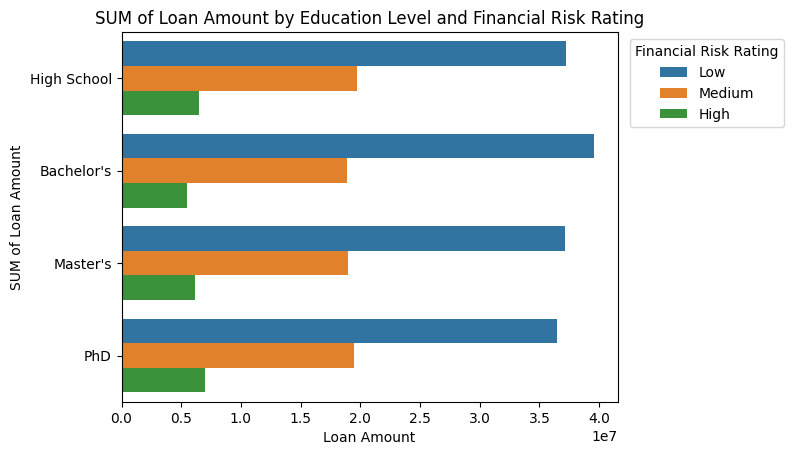

In [38]:
# barplot with title and custom y label and legend
sns.barplot(
    df_clean, 
    x="Loan Amount",
    y="Education Level", 
    hue="Risk Rating",
    estimator="sum",
    errorbar=None
)

plt.title("SUM of Loan Amount by Education Level and Financial Risk Rating")
plt.ylabel("SUM of Loan Amount")
plt.legend(
    title="Financial Risk Rating", 
    bbox_to_anchor=(1.35, 1)
)
plt.show()

Insights:   
- **Among all Education Levels, highest loan in total are considered as low financial risk rating.**
- Lowest sum of loan in total, precisely having high financial risk rating.
- This might be because **people with high amount of loan able to manage their financial and generate more revenue with it.**

## AVG of Debt-to-Income Ratio by Employment Status and Age Group

In [39]:
# find debt to income ration by employment status and age group
df_clean.groupby(["Employment Status", "Age Group"], observed=True).agg({"Debt-to-Income Ratio": "mean"})

Debt-to-Income Ratio
Employment Status Age Group                      
Employed          18-28                  0.346246
                  28-38                  0.347803
                  38-48                  0.352461
                  48-58                  0.359627
                  58-69                  0.341508
Self-employed     18-28                  0.359479
                  28-38                  0.355932
                  38-48                  0.337419
                  48-58                  0.351603
                  58-69                  0.342195
Unemployed        18-28                  0.344861
                  28-38                  0.356934
                  38-48                  0.344996
                  48-58                  0.360068
                  58-69                  0.358492

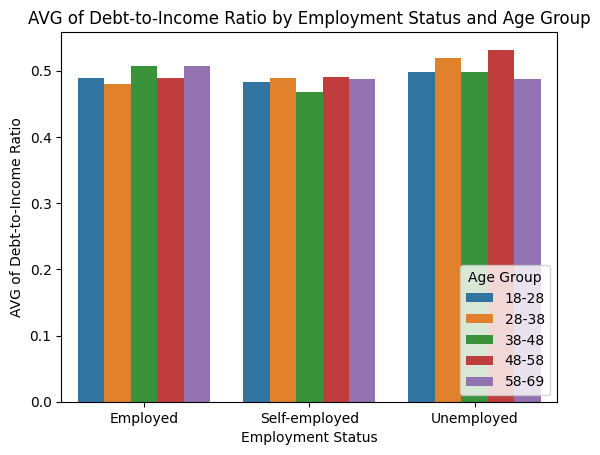

In [49]:
# barplot with title and custom y label and legend
sns.barplot(
    df_clean, 
    x="Employment Status", 
    y="Debt-to-Income Ratio",
    hue="Age Group",
    estimator="mean",
    errorbar=None
)

plt.title("AVG of Debt-to-Income Ratio by Employment Status and Age Group")
plt.ylabel("AVG of Debt-to-Income Ratio")
plt.legend(loc="lower right", title="Age Group")
plt.show()

Insights:   
- Average of Debt-to-Income ratio (DTI) for each employment status and grouped by age group seem similar.
- Age group of 18-28 for self-employed are having the highest DTI on the group, but not significanly compared to others
- Employed people within range of age 48-58 are having highest DTI, also not significanly compared to others
- Based on the visualization **I conclude that Age and Employment Status don't have any correlation to DTI.**

## AVG of assets based on their educational level and risk rating

In [41]:
# find sum of assets value by education level and risk rating
df_clean.groupby(["Education Level", "Risk Rating"], observed=True).agg({"Assets Value": "sum"})

Assets Value
Education Level Risk Rating              
High School     Low           221947504.0
                Medium        116112520.0
                High           35830703.0
Bachelor's      Low           222342571.0
                Medium        114246936.0
                High           33689928.0
Master's        Low           219744238.0
                Medium        107153593.0
                High           34546780.0
PhD             Low           215285892.0
                Medium        110567550.0
                High           40688789.0

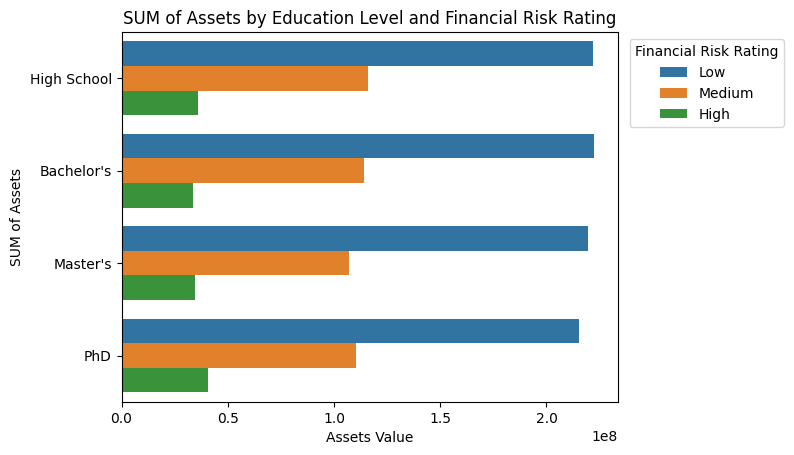

In [42]:
# show barplot with label and custom ylabel & legend
sns.barplot(
    df_clean,
    y="Education Level",
    x="Assets Value",
    orient="h",
    hue="Risk Rating",
    estimator="sum",
    errorbar=None
)

plt.title("SUM of Assets by Education Level and Financial Risk Rating")
plt.ylabel("SUM of Assets")
plt.legend(
    title="Financial Risk Rating",
    bbox_to_anchor=(1.35, 1)
)
plt.show()

Insights:
- The graph shown that people with highet assets are having low financial risk rating.
- People with lowest assets are having high financial risk rating.

## srtsrt

In [50]:
df_clean.columns

Index(['Age', 'Assets Value', 'Debt-to-Income Ratio', 'Education Level',
       'Employment Status', 'Income', 'Loan Amount', 'Loan Purpose',
       'Risk Rating', 'Age Group'],
      dtype='object')

In [63]:
45713/72799.0

0.6279344496490337

In [64]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [58]:
df_clean[["Income", "Loan Amount", "Debt-to-Income Ratio"]].head()

,Income,Loan Amount,Debt-to-Income Ratio
0,72799.0,45713.0,0.154313
2,55687.0,36623.0,0.362398
3,26508.0,26541.0,0.454964
4,49427.0,36528.0,0.143242
9,32190.0,29918.0,0.484333


# deb-to-income ratio is misleading

In [66]:
# new columns to contain loan to income ratio range values: 0-1
df_clean["Loan-to-Income Ratio"] = df_clean["Loan Amount"]/df_clean["Income"]

In [67]:
df_clean[["Income", "Loan Amount", "Loan-to-Income Ratio", "Debt-to-Income Ratio"]]

,Income,Loan Amount,Loan-to-Income Ratio,Debt-to-Income Ratio
0,72799.0,45713.0,6.279344,0.154313
2,55687.0,36623.0,6.576580,0.362398
3,26508.0,26541.0,10.012449,0.454964
4,49427.0,36528.0,7.390293,0.143242
9,32190.0,29918.0,9.294191,0.484333
...,...,...,...,...
14993,108293.0,27013.0,2.494436,0.362077
14994,43655.0,34565.0,7.917764,0.399901
14996,107193.0,35111.0,3.275494,0.155126
14997,46250.0,44369.0,9.593297,0.593999


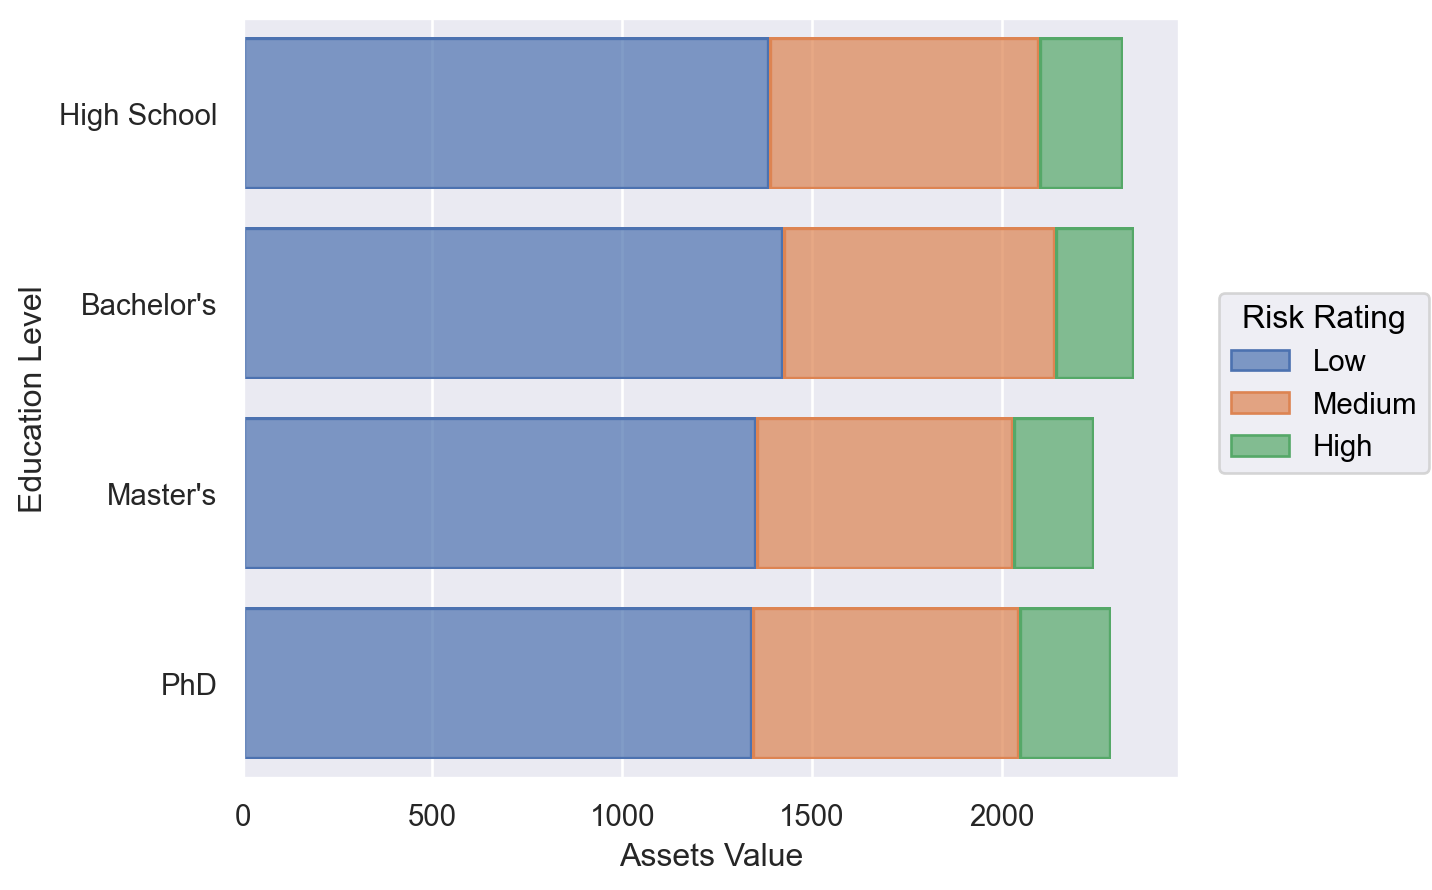

In [53]:
# show barplot with label and custom ylabel & legend
(
    so.Plot(
        df_clean,
        y="Education Level",
        x="Assets Value",
        color="Risk Rating",
    ).add(so.Bar(), so.Count(), so.Stack())
)

## Proportion of High Financial Risk Rating by Age Group

In [43]:
# filter high risk rating only and get age group column
prop_high_fin_risk_by_age_group = df_clean.loc[df_clean["Risk Rating"]=="High", "Age Group"].value_counts(normalize=True)
prop_high_fin_risk_by_age_group

Age Group
58-69    0.226862
38-48    0.198646
28-38    0.197517
48-58    0.190745
18-28    0.186230
Name: proportion, dtype: float64

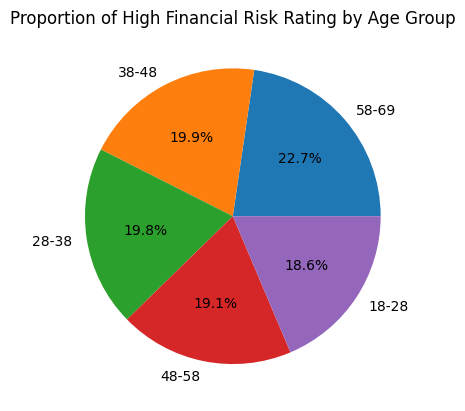

In [44]:
# show pie plot with title
plt.pie(prop_high_fin_risk_by_age_group, labels=prop_high_fin_risk_by_age_group.keys(), autopct='%.1f%%')

plt.title("Proportion of High Financial Risk Rating by Age Group")
plt.show()

Insights: 
- Age group 58-69 is the highest proportion of high financial risk rating by 22.7%.
- The proportion of high financial risk rating among all age group is very similar.
- In conclution, the graph shown that **age doesn't have correlation with financial risk, since the proportions are almost identical**

## Proportion of Loan Purposes by High Financial Risk Rating

In [45]:
# filter high risk rating only and ge loan purpose column
prop_loan_purpose_by_high_fin_rating = df_clean.loc[df_clean["Risk Rating"]=="High", "Loan Purpose"].value_counts(normalize=True)
prop_loan_purpose_by_high_fin_rating

Loan Purpose
Auto        0.274266
Personal    0.261851
Home        0.249436
Business    0.214447
Name: proportion, dtype: float64

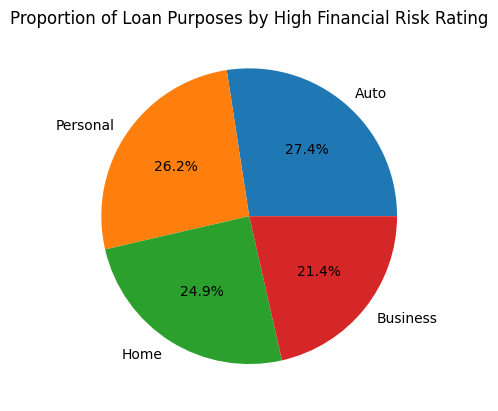

In [46]:
# show pie plot with title
plt.pie(
    prop_loan_purpose_by_high_fin_rating, 
    labels=prop_loan_purpose_by_high_fin_rating.keys(), 
    autopct='%.1f%%'
)

plt.title("Proportion of Loan Purposes by High Financial Risk Rating")
plt.show()

Insights: 
- `Auto is the highest loan purpose from high financial risk rating` followed by personal and home.
- Proportion of loan purposes with high financial risk rating are almost equal.
- `All loan purposes have almost equal impact on High Financial Risk Rating`
- Hence, I conclude that **there's no assosiation between these variables**

## Debt-to-Income Ratio Distribution among Education Level

<Axes: xlabel='Employment Status', ylabel='Debt-to-Income Ratio'>

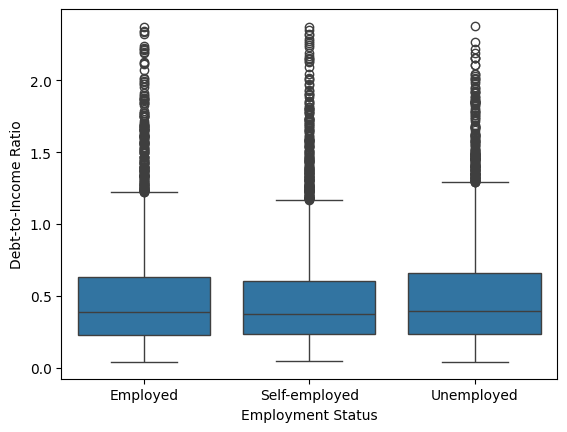

In [50]:
sns.boxplot(
    df_clean, 
    x="Employment Status",
    y="Debt-to-Income Ratio"
)

Insights:
- DTI distributions among Employment Status are also exactly the same.
- Thus, **Employment Status and DTI don't have any assosiations**

## Debt-to-income Ratio Distribution among Financial Risk Rating

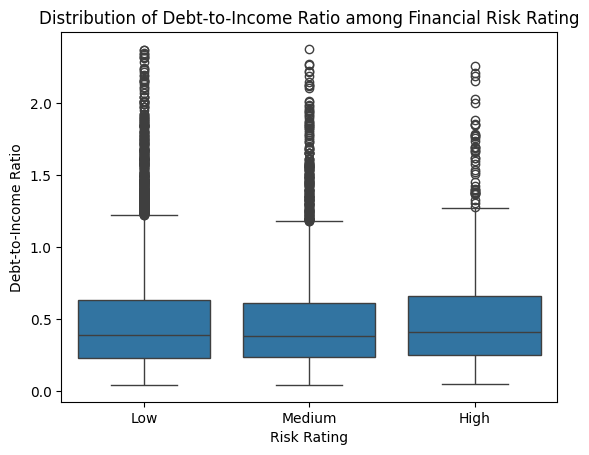

In [51]:
# show boxplot of debt-to-income ratio on each risk rating with title
sns.boxplot(data=df_clean, x="Risk Rating", y="Debt-to-Income Ratio")
plt.title("Distribution of Debt-to-Income Ratio among Financial Risk Rating")
plt.show()

Insights:
- Data distribution of Debt-to-Income ratio among all Risk Rating categories are equal
- Hence, **there is no association between the Debt-to-Income ratio and Risk Rating categories**

## Debt-to-Income Ratio Distribution among Employment Status

<Axes: xlabel='Education Level', ylabel='Debt-to-Income Ratio'>

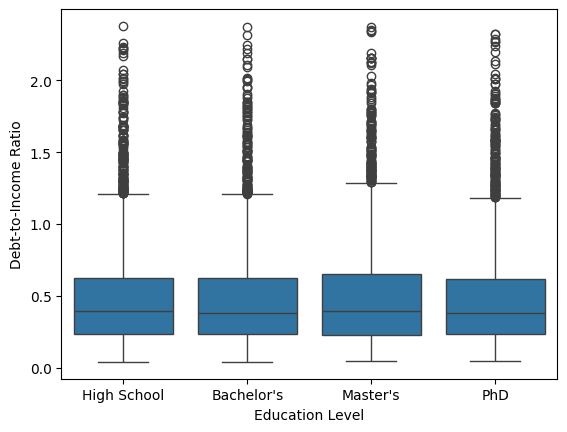

In [52]:
sns.boxplot(
    df_clean, 
    x="Education Level",
    y="Debt-to-Income Ratio"
)

Insights:
- DTI distributions among education level are exactly the same
- Therefore, Education Level doesn't have assosiations with DTI

## How are the education level and risk rating correlated?

I will answer the question by conducting hypothesis testing stated below.
- H0: There's no correlation between education level and risk rating (The variables are independent)
- H1: Education level and risk rating are correlated to each other (The variables are not independent)

In [54]:
# crosstab on education level and risk rating
education_level_vs_risk_rating = pd.crosstab(df_clean["Education Level"], df_clean["Risk Rating"])
education_level_vs_risk_rating

Risk Rating,Low,Medium,High
Education Level,,,
High School,1386,713,220
Bachelor's,1425,716,209
Master's,1353,676,214
PhD,1342,703,243


In [55]:
# chi squared test
"Pval: {:.2f}".format(stats.chi2_contingency(education_level_vs_risk_rating).pvalue)

'Pval: 0.57'

Insights:
- Since the p-value is greater that critical value (0.53 > 0.05), the hypothesis test shown that H0 is fail to rejected.

- Which means that **there's no significant evidence that education level and risk rating are having an assosiation**

# Conclusions

- People who have **high total loan amount and assets tend to have a low financial risk rating.**
- The Debt-to-Income Ratio (DTI) is almost identical across all age groups, regardless of whether individuals are unemployed, self-employed, or employed.
- All loan purposes are having nearly identical proportion on High Financial Risk Rating
- All Age groups categories are also having nearly identical proportion on Financial Risk Ratings categories
- **There's no assotiations between DTI and Financial Risk Ratings categories**
- **There's no significant assotiations between Education Level and Financial Risk Rating**

> Individuals needs to increase their total assets and learn to manage their loan, so they can generate more revenue which can lead to decrease their financial risk rating.

# Export Clean Data

In [56]:
# export cleaned dataset into .csv format
# df_clean.to_csv("dataset/clean_financial_risk_assesment.csv", index=False)